# Pymaceuticals Inc.
---

### Analysis

- It seems there is a relation between mouse weight and Tumor Volume. Capomulin and Ramicane seem to be the two most effective drugs with Capomulin being the better of the two.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_merge = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mouse_count = study_merge["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = study_merge[study_merge.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
dupe_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = study_merge[study_merge['Mouse ID'].isin(dupe_mouse)]
dupe_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = study_merge[study_merge['Mouse ID'] !='g989'].drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = clean_study['Mouse ID'].nunique()
new_num_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp_drug_regimen = clean_study.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grp_drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grp_drug_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grp_drug_regimen['Tumor Volume (mm3)'].var()
std_deviation_tumor_volume = grp_drug_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grp_drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Std Deviation Tumor Volume': std_deviation_tumor_volume,
    'SEM Tumor Volume': sem_tumor_volume
})
drug_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
stats_df = (
    clean_study.groupby('Drug Regimen')['Tumor Volume (mm3)']
    .agg(Mean='mean', Median='median', Variance='var', Std='std', SEM='sem')
    .reset_index()
    .set_index('Drug Regimen')
)
# Rename the columns for clarity
stats_df.columns = ['mean', 'median', 'var', 'std', 'sem']
# Add a MultiIndex for 'Tumor Volume (mm3)'
stats_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], stats_df.columns])
stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

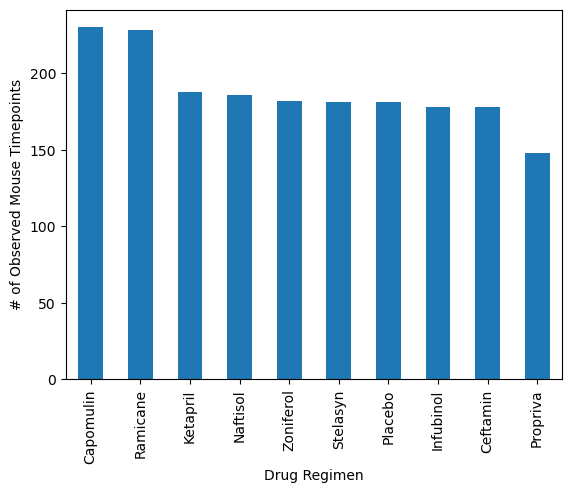

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_study['Drug Regimen'].value_counts().plot(kind='bar', ylabel='# of Observed Mouse Timepoints')

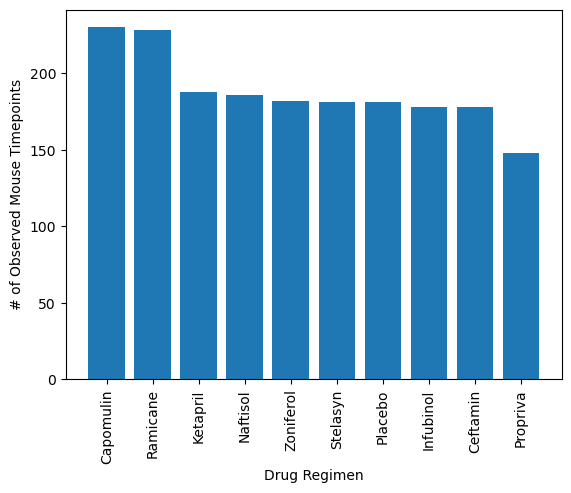

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_study['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values, align='center', alpha=1.0)
plt.xticks(rotation=90) 
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints');

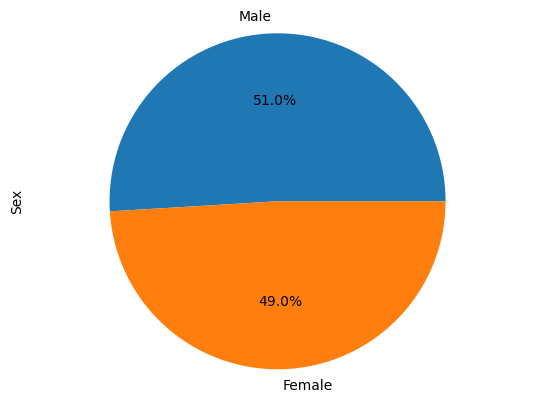

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_study['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal');

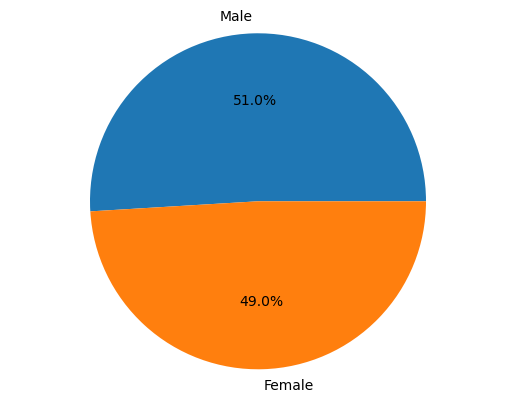

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_study['Sex'].value_counts()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')
plt.axis('equal');


## Quartiles, Outliers and Boxplots

In [16]:

# Step 1: Group the cleaned DataFrame by "Mouse ID" and find the maximum time point
max_timepoints = clean_study.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Create a new DataFrame with the mouse IDs and their last time points
last_timepoints_df = pd.DataFrame({
    'Mouse ID': max_timepoints['Mouse ID'],
    'Last Timepoint': max_timepoints['Timepoint']
})

# Step 3: Merge the new DataFrame with the original cleaned DataFrame
merged_df = pd.merge(clean_study, last_timepoints_df, on='Mouse ID', how='right')

# Display the merged DataFrame
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,a203,0,45.000000,0,Infubinol,Female,20,23,45
1,a203,5,48.508468,0,Infubinol,Female,20,23,45
2,a203,10,51.852437,1,Infubinol,Female,20,23,45
3,a203,15,52.777870,1,Infubinol,Female,20,23,45
4,a203,20,55.173336,1,Infubinol,Female,20,23,45


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time = merged_df.groupby('Mouse ID').max().Timepoint.reset_index().merge(merged_df, on= ['Mouse ID','Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

for drug in drugs:
    tumor = max_time[max_time['Drug Regimen']==drug]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    upper = tumor.quantile(.75) + 1.5 * iqr
    lower = tumor.quantile(.25) - 1.5 * iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumor_volume_data.append(tumor)

    
    # Determine outliers using upper and lower bounds
    print(f'Potetial outliers for {drug} are: {tumor[(tumor<=lower)|(tumor>=upper)]}')

Potetial outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potetial outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potetial outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potetial outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


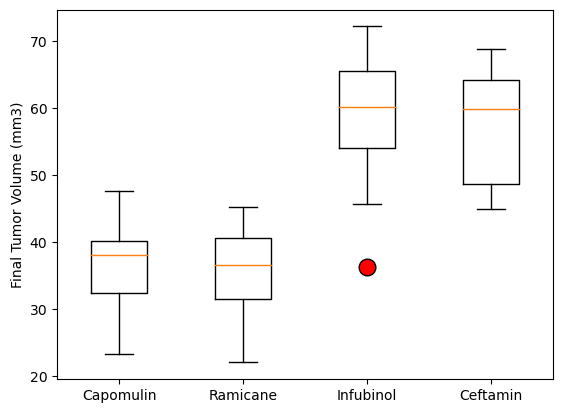

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
data_to_plot = tumor_volume_data  # Use the previously collected tumor_volume_data

# Create labels for each treatment group
labels = drugs

# Create a box plot
plt.boxplot(data_to_plot, labels=labels, flierprops={'markerfacecolor':'red','markersize':12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap = merged_df[merged_df['Drug Regimen']=='Capomulin']


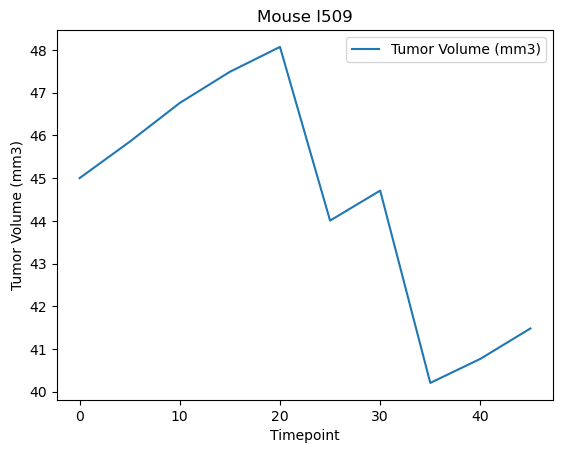

In [27]:
cap[cap['Mouse ID'] =='l509'].plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse l509');

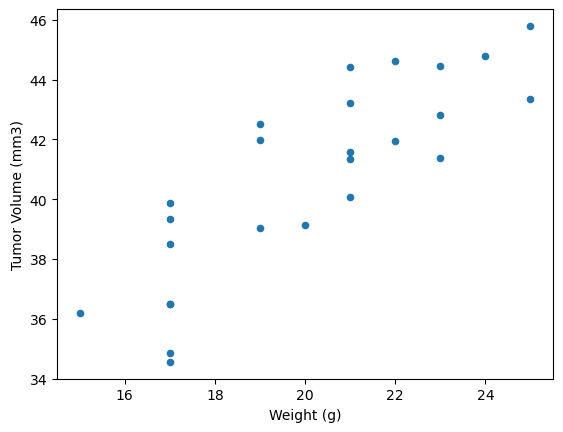

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).plot.scatter(x='Weight (g)', y=('Tumor Volume (mm3)'));

## Correlation and Regression

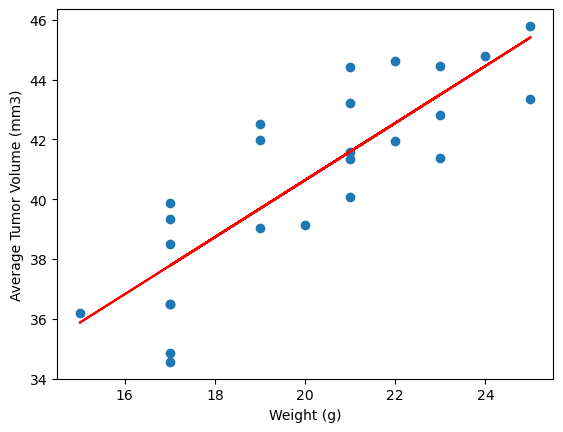

In [21]:
# Calculate the correlation coefficient and a linear regression model 
data = cap.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
model = st.linregress(data['Weight (g)'], data['Tumor Volume (mm3)'])
m = model.slope
b = model.intercept
prediction = m * data['Weight (g)'] + b


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(data['Weight (g)'], data['Tumor Volume (mm3)'])
plt.plot(data['Weight (g)'], prediction, color='red');
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');